### Montamos nuestro Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Se abrira un link para PERMITIR 'Google Files Stream'
# para acceder a nuestro drive

# Archivos del Drive in '/content/drive/My Drive'
!ls '/content/drive/My Drive'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Archivos del Drive in '/content/drive/My Drive'
!ls '/content/drive/My Drive'

 4_1_4_js
 carta_presentacion.gdoc
 Classroom
 CleanCode
'Colab Notebooks'
 data_sahid
'ejemplos.zip (Unzipped Files)'
 Explainable_machine_learning__1686991296.pdf
 ISLP_website.pdf
 ISLRv2_website.pdf
 JSX
 Maths_for_ML_1687527881.pdf
 Programacion
 Proyecto_Ideas.gdoc
'recursos.zip (Unzipped Files)'
'Redes Neuronales.gdoc'
 Statistics_for_Data_Science_1686747162.pdf


## TAREA 2: IMPORTAR LAS LIBRERIAS Y DATASETS

In [ ]:
import pandas as pd
import numpy as np
import os
import PIL
import seaborn as sns
import pickle
from PIL import *
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
# from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

2.4. Cargamos los puntos faciales clave en un df

In [ ]:
df_puntos_faciales = pd.read_csv('/content/drive/MyDrive/CleanCode/data.csv')
df_puntos_faciales

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,67.180378,35.816373,33.239956,34.921932,59.347973,37.000904,72.667896,37.097600,39.404349,36.589944,...,60.065396,64.397610,73.248393,35.446431,74.014748,48.708626,76.760852,48.559612,77.335618,191 191 191 190 189 185 184 120 54 34 19 24 31...
2136,65.724490,36.301020,25.377551,37.311224,58.530612,37.739796,74.448980,37.525510,33.551020,38.107143,...,62.472789,66.928121,79.229046,28.015377,81.151722,48.771976,81.816774,49.287271,82.871156,19 19 19 18 13 7 3 4 3 1 3 9 11 12 12 13 10 9 ...
2137,68.430866,38.651975,28.895857,37.617027,61.659350,40.100902,75.586792,40.219182,37.665118,39.087245,...,63.289576,68.864397,77.495823,22.013981,77.368995,49.180628,79.043130,47.176739,89.544522,31 40 47 31 54 58 63 100 86 80 82 75 79 86 90 ...
2138,64.152180,30.691592,27.000898,40.868082,56.505624,34.126963,73.436776,28.556335,34.746122,40.506939,...,59.735799,73.730743,70.273886,38.777143,80.684286,58.042857,79.301429,58.611086,80.355543,7 1 5 1 3 20 12 0 5 8 6 18 13 9 8 12 12 11 4 8...


2.6. Obtenemos información relevante del dataset

In [ ]:
df_puntos_faciales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

2.7. Comprobamos si hay valores nulos en el dataset

In [ ]:
df_puntos_faciales.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

2.8. Composición del df

In [ ]:
df_puntos_faciales['Image'].shape

(2140,)

2.9. Dado que los valores para la imagen se dan como cadenas separadas por espacios, separamos los
valores usando ' ' como separador.
Luego convertimos esto en una matriz numérica usando np.fromstring y convierta la matriz 1D obtenida
en una matriz 2D de forma (96, 96)

In [ ]:
# SOLUCION OSCAR
# df_puntos_faciales['Image'] = df_puntos_faciales['Image'].apply(lambda x:
# np.fromstring(x, dtype = int, sep = ' ').reshape(96, 96))

# df_puntos_faciales['Image'][0].shape

In [ ]:
# Extrae los valores de la columna 'imagen' como una lista de cadenas
imagen_strings = df_puntos_faciales['Image'].tolist()

# Une las cadenas de la lista en una sola cadena separada por espacios
imagen_str = ' '.join(imagen_strings)

# Convierte la cadena en una matriz 1D de números
matriz_1d = np.fromstring(imagen_str, sep=' ')

# Convierte la matriz 1D en una matriz 2D de forma (96, 96)
# Hace falta indicar el número de elementos que contiene, 2140 rows - imagenes
matriz_2d = np.reshape(matriz_1d, (2140, 96, 96))


In [ ]:
matriz_1d

array([238., 236., 237., ..., 125., 124., 119.])

In [ ]:
matriz_2d

array([[[238., 236., 237., ..., 250., 250., 250.],
        [235., 238., 236., ..., 249., 250., 251.],
        [237., 236., 237., ..., 251., 251., 250.],
        ...,
        [186., 183., 181., ...,  52.,  57.,  60.],
        [189., 188., 207., ...,  61.,  69.,  78.],
        [191., 184., 184., ...,  70.,  75.,  90.]],

       [[219., 215., 204., ...,  92.,  88.,  84.],
        [222., 219., 220., ...,  92.,  88.,  86.],
        [231., 224., 212., ...,  77.,  80.,  84.],
        ...,
        [  1.,   1.,   1., ...,   1.,   1.,   1.],
        [  1.,   1.,   1., ...,   1.,   1.,   1.],
        [  1.,   1.,   1., ...,   1.,   1.,   1.]],

       [[144., 142., 159., ..., 208., 207., 207.],
        [143., 142., 161., ..., 208., 208., 207.],
        [143., 140., 160., ..., 209., 209., 207.],
        ...,
        [ 66.,  70.,  69., ...,  81., 134., 194.],
        [ 65.,  69.,  71., ...,  75.,  83., 109.],
        [ 65.,  68.,  70., ...,  78.,  78.,  77.]],

       ...,

       [[ 31.,  40.,  47

In [ ]:
tamano_imagen = matriz_2d.shape[1:]
cantidad_imagenes = matriz_2d.shape[0]
print("Tamaño de las imagenes: {}x{}".format(*tamano_imagen))
print("Cantidad de imagenes: {}".format(cantidad_imagenes))

Tamaño de las imagenes: 96x96
Cantidad de imagenes: 2140


2.12. MINI RETO #1: Obtenga los valores promedio, mínimo y máximo para right_eye_center_x.

In [ ]:
df_puntos_faciales.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,...,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,66.221549,36.842274,29.640269,37.063815,59.272128,37.856014,73.412473,37.640110,36.603107,37.920852,...,47.952141,57.253926,63.419076,75.887660,32.967365,76.134065,48.081325,72.681125,48.149654,82.630412
std,2.087683,2.294027,2.051575,2.234334,2.005631,2.034500,2.701639,2.684162,1.822784,2.009505,...,3.276053,4.528635,3.650131,4.438565,3.595103,4.259514,2.723274,5.108675,3.032389,4.813557
min,47.835757,23.832996,18.922611,24.773072,41.779381,27.190098,52.947144,26.250023,24.112624,26.250023,...,24.472590,41.558400,43.869480,57.023258,9.778137,56.690208,32.260312,56.719043,33.047605,57.232296
25%,65.046300,35.468842,28.472224,35.818377,58.113054,36.607950,71.741978,36.102409,35.495730,36.766783,...,46.495330,54.466000,61.341291,72.874263,30.879288,73.280038,46.580004,69.271669,46.492000,79.417480
50%,66.129065,36.913319,29.655440,37.048085,59.327154,37.845220,73.240045,37.624207,36.620735,37.920336,...,47.900511,57.638582,63.199057,75.682465,33.034022,75.941985,47.939031,72.395978,47.980854,82.388899
75%,67.332093,38.286438,30.858673,38.333884,60.521492,39.195431,74.978684,39.308331,37.665280,39.143921,...,49.260657,60.303524,65.302398,78.774969,35.063575,78.884031,49.290000,75.840286,49.551936,85.697976
max,78.013082,46.132421,42.495172,45.980981,69.023030,47.190316,87.032252,49.653825,47.293746,44.887301,...,65.279654,75.992731,84.767123,94.673637,50.973348,93.443176,61.804506,93.916338,62.438095,95.808983


In [ ]:
df_puntos_faciales['right_eye_center_x'].describe()

count    2140.000000
mean       29.640269
std         2.051575
min        18.922611
25%        28.472224
50%        29.655440
75%        30.858673
max        42.495172
Name: right_eye_center_x, dtype: float64

## TAREA #3: VISUALIZACIÓN DE IMÁGENES

3.1. Representamos una imagen aleatoria del conjunto de datos junto con puntos clave faciales

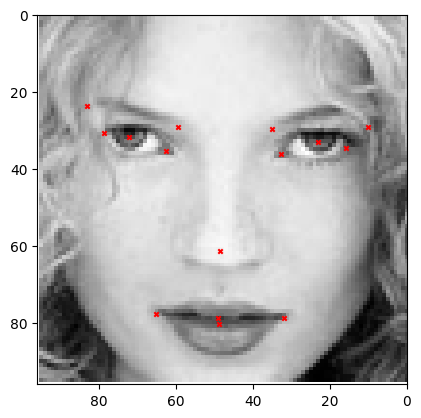

In [ ]:
# Imagen aleatoria y las coordenadas correspondientes
indice_aleatorio = np.random.randint(len(df_puntos_faciales))  # Indice aleatorio dentro del rango de filas del DataFrame
imagen_str = df_puntos_faciales.loc[indice_aleatorio, 'Image']  # Cadena de la imagen correspondiente al índice aleatorio

# Selecciona las columnas pares de las coordenadas x
coordenadas_x = df_puntos_faciales.loc[indice_aleatorio, [col for idx, col in enumerate(df_puntos_faciales.columns) if idx % 2 == 0 and col != 'Image']]

# Selecciona las columnas impares de las coordenadas y
coordenadas_y = df_puntos_faciales.loc[indice_aleatorio, [col for idx, col in enumerate(df_puntos_faciales.columns) if idx % 2 != 0]]

# Convierte la cadena de la imagen en una matriz 2D de forma (96, 96)
imagen_matriz = np.fromstring(imagen_str, sep=' ').reshape(96, 96)

# Muestra la imagen y los puntos clave faciales utilizando plt.imshow
plt.imshow(imagen_matriz, cmap='gray')

# Dibuja los puntos clave faciales en la imagen
plt.scatter(coordenadas_x, coordenadas_y, c='r', marker='x', s=10)

# Configura los límites de los ejes
plt.xlim(96, 0)
plt.ylim(96, 0)

# Muestra la imagen con los puntos clave faciales
plt.show()

3.2. Veamos más imágenes en formato matricial

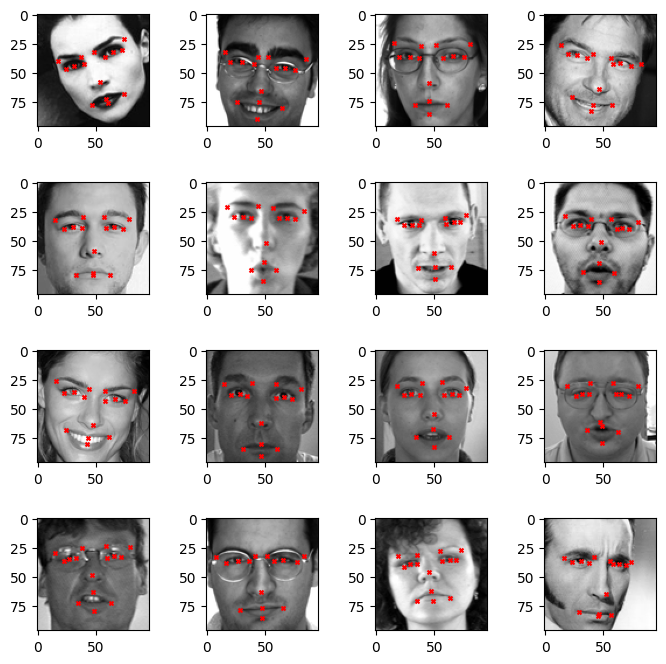

In [ ]:
# Define el número de imágenes que deseas mostrar
# Hay que tener en cuenta que la matriz de imagenes será cuadrada (SOLO num pares)
num_imagenes = 16 #Introducir el número de imagenes que queremos imprimir en pantalla

# Crea una matriz de subfiguras
fig, axes = plt.subplots(nrows=int(num_imagenes**0.5), ncols=int(num_imagenes**0.5), figsize=(8, 8))

# Genera índices aleatorios únicos para seleccionar las imágenes
indices_aleatorios = np.random.choice(len(df_puntos_faciales), size=num_imagenes, replace=False)

# Itera sobre las subfiguras y los índices aleatorios para mostrar las imágenes
for i, ax in enumerate(axes.flat):
    indice = indices_aleatorios[i]
    imagen_str = df_puntos_faciales.loc[indice, 'Image']
    coordenadas_x = df_puntos_faciales.loc[indice, [col for idx, col in enumerate(df_puntos_faciales.columns) if idx % 2 == 0 and col != 'Image']]
    coordenadas_y = df_puntos_faciales.loc[indice, [col for idx, col in enumerate(df_puntos_faciales.columns) if idx % 2 != 0]]

    imagen_matriz = np.fromstring(imagen_str, sep=' ').reshape(96, 96)
    ax.imshow(imagen_matriz, cmap='gray')
    ax.scatter(coordenadas_x, coordenadas_y, c='r', marker='x', s=8)
    ax.axis('on')  # Activa los ejes


# Ajusta los espacios entre las imágenes en los ejes
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Muestra las imágenes en formato matricial
plt.show()


MINI RETO #2:
- Realiza una verificación adicional en los datos visualizando aleatoriamente 64 nuevas imágenes
junto con sus puntos clave correspondientes

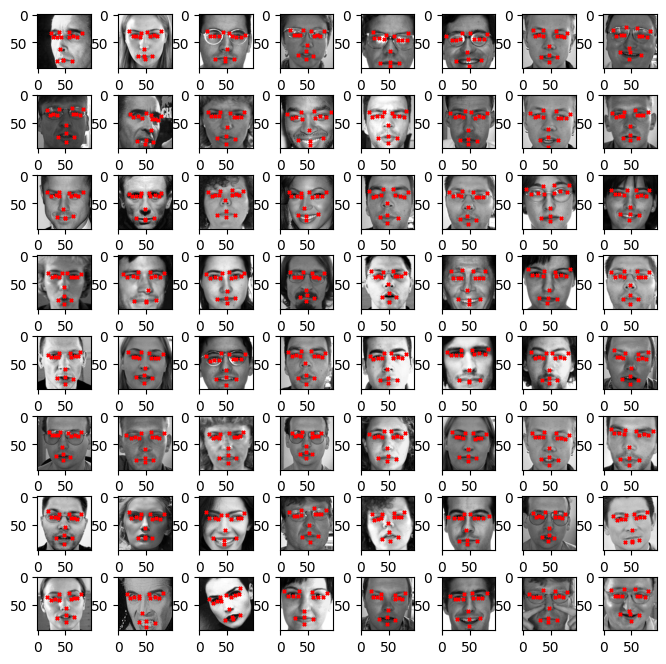

In [ ]:
# Define el número de imágenes que deseas mostrar
# Hay que tener en cuenta que la matriz de imagenes será cuadrada (SOLO num pares)
num_imagenes = 64 #Introducir el número de imagenes que queremos imprimir en pantalla

# Crea una matriz de subfiguras
fig, axes = plt.subplots(nrows=int(num_imagenes**0.5), ncols=int(num_imagenes**0.5), figsize=(8, 8))

# Genera índices aleatorios únicos para seleccionar las imágenes
indices_aleatorios = np.random.choice(len(df_puntos_faciales), size=num_imagenes, replace=False)

# Itera sobre las subfiguras y los índices aleatorios para mostrar las imágenes
for i, ax in enumerate(axes.flat):
    indice = indices_aleatorios[i]
    imagen_str = df_puntos_faciales.loc[indice, 'Image']
    coordenadas_x = df_puntos_faciales.loc[indice, [col for idx, col in enumerate(df_puntos_faciales.columns) if idx % 2 == 0 and col != 'Image']]
    coordenadas_y = df_puntos_faciales.loc[indice, [col for idx, col in enumerate(df_puntos_faciales.columns) if idx % 2 != 0]]

    imagen_matriz = np.fromstring(imagen_str, sep=' ').reshape(96, 96)
    ax.imshow(imagen_matriz, cmap='gray')
    ax.scatter(coordenadas_x, coordenadas_y, c='r', marker='x', s=5)
    ax.axis('on')  # Activa los ejes


# Ajusta los espacios entre las imágenes en los ejes
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Muestra las imágenes en formato matricial
plt.show()

## TAREA #4: AUMENTACIÓN DE LAS IMÁGENES
Aumentamos el numero de imagenes

4.1. Creamos una copia del dataframe



In [ ]:
df_volteado_horizontal = df_puntos_faciales.copy()

4.2. Obtenemos el nombre de las columnas del dataframe

In [ ]:
df_volteado_horizontal.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')

4.3. Horizontal Flip - Damos la vuelta a las imágenes entorno al eje y

Dado que estamos volteando horizontalmente, los valores de la coordenada y serían los mismos
Solo cambiarían los valores de la coordenada x, todo lo que tenemos que hacer es restar nuestros
valores iniciales de la coordenada x del ancho de la imagen (96)

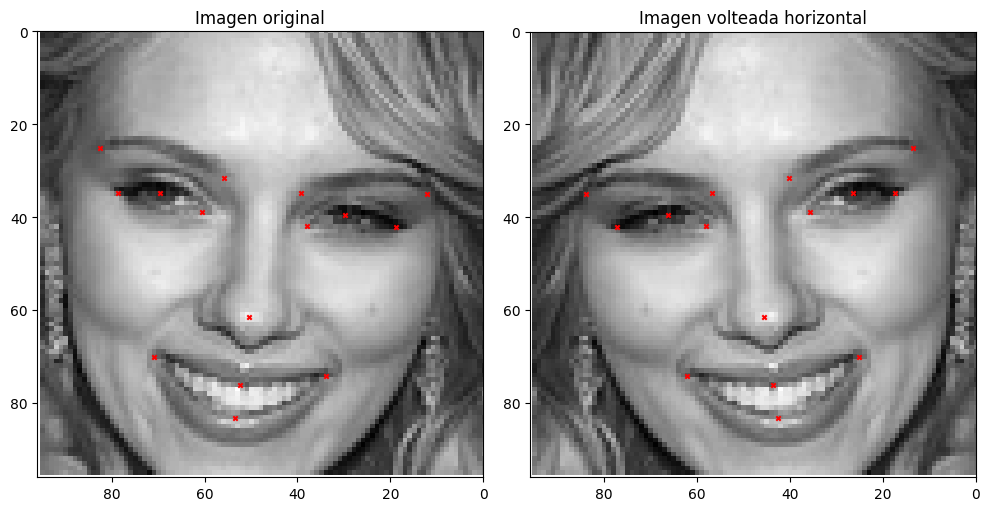

In [ ]:
# Imagen aleatoria y las coordenadas correspondientes
indice_aleatorio = np.random.randint(len(df_volteado_horizontal))  # Indice aleatorio dentro del rango de filas del DataFrame
imagen_str = df_volteado_horizontal.loc[indice_aleatorio, 'Image']  # Cadena de la imagen correspondiente al índice aleatorio

# Selecciona las columnas pares de las coordenadas x
coordenadas_x = df_volteado_horizontal.loc[indice_aleatorio, [col for idx, col in enumerate(df_volteado_horizontal.columns) if idx % 2 == 0 and col != 'Image']]

# Selecciona las columnas impares de las coordenadas y
coordenadas_y = df_volteado_horizontal.loc[indice_aleatorio, [col for idx, col in enumerate(df_volteado_horizontal.columns) if idx % 2 != 0]]

# Convierte la cadena de la imagen en una matriz 2D de forma (96, 96)
imagen_matriz = np.fromstring(imagen_str, sep=' ').reshape(96, 96)
imagen_matriz_volteada = np.flip(imagen_matriz,axis=1)

# Configura el gráfico con subplots para mostrar la imagen original y la volteada
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Muestra la imagen original
axes[0].imshow(imagen_matriz, cmap='gray')
axes[0].scatter(coordenadas_x, coordenadas_y, c='r', marker='x', s=10)
axes[0].set_xlim(96, 0)
axes[0].set_ylim(96, 0)
axes[0].set_title('Imagen original')

# Muestra la imagen volteada
axes[1].imshow(imagen_matriz_volteada, cmap='gray')
axes[1].scatter(96 - coordenadas_x, coordenadas_y, c='r', marker='x', s=10)
axes[1].set_xlim(96, 0)
axes[1].set_ylim(96, 0)
axes[1].set_title('Imagen volteada horizontal')

# Ajusta los espacios entre los subplots
plt.tight_layout()

# Muestra la figura con las dos imágenes
plt.show()

4.5. Mostramos la imagen original

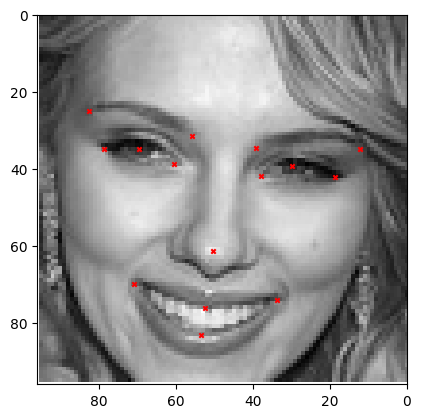

In [ ]:
# Imagen aleatoria y las coordenadas correspondientes
imagen_str = df_puntos_faciales.loc[indice_aleatorio, 'Image']  # Cadena de la imagen correspondiente al indice aleatorio

# Selecciona las columnas pares de las coordenadas x
coordenadas_x = df_puntos_faciales.loc[indice_aleatorio, [col for idx, col in enumerate(df_puntos_faciales.columns) if idx % 2 == 0 and col != 'Image']]

# Selecciona las columnas impares de las coordenadas y
coordenadas_y = df_puntos_faciales.loc[indice_aleatorio, [col for idx, col in enumerate(df_puntos_faciales.columns) if idx % 2 != 0]]

# Convierte la cadena de la imagen en una matriz 2D de forma (96, 96)
imagen_matriz = np.fromstring(imagen_str, sep=' ').reshape(96, 96)

# Muestra la imagen y los puntos clave faciales utilizando plt.imshow
plt.imshow(imagen_matriz, cmap='gray')

# Dibuja los puntos clave faciales en la imagen
plt.scatter(coordenadas_x, coordenadas_y, c='r', marker='x', s=10)

# Configura los límites de los ejes
plt.xlim(96, 0)
plt.ylim(96, 0)

# Muestra la imagen con los puntos clave faciales
plt.show()

4.6. Mostramos la imagen girada horizontalmente

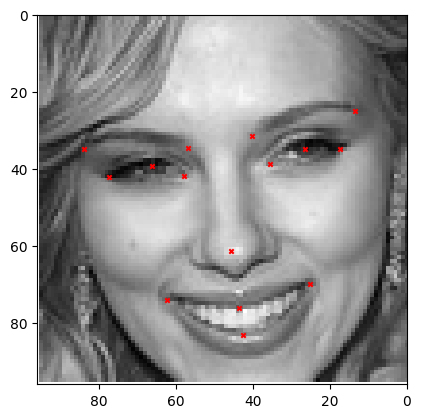

In [ ]:
# Imagen aleatoria y las coordenadas correspondientes
imagen_str = df_volteado_horizontal.loc[indice_aleatorio, 'Image']  # Cadena de la imagen correspondiente al índice aleatorio

# Selecciona las columnas pares de las coordenadas x
coordenadas_x = df_volteado_horizontal.loc[indice_aleatorio, [col for idx, col in enumerate(df_volteado_horizontal.columns) if idx % 2 == 0 and col != 'Image']]
coordenadas_x = 96 - coordenadas_x
# Selecciona las columnas impares de las coordenadas y
coordenadas_y = df_volteado_horizontal.loc[indice_aleatorio, [col for idx, col in enumerate(df_volteado_horizontal.columns) if idx % 2 != 0]]

# Convierte la cadena de la imagen en una matriz 2D de forma (96, 96)
imagen_matriz = np.fromstring(imagen_str, sep=' ').reshape(96, 96)
imagen_matriz_volteada = np.flip(imagen_matriz,axis=1)

# Muestra la imagen y los puntos clave faciales utilizando plt.imshow
plt.imshow(imagen_matriz_volteada, cmap='gray')

# Dibuja los puntos clave faciales en la imagen
plt.scatter(coordenadas_x, coordenadas_y, c='r', marker='x', s=10)

# Configura los límites de los ejes
plt.xlim(96, 0)
plt.ylim(96, 0)

# Muestra la imagen con los puntos clave faciales
plt.show()

4.7. Concatenamos el dataset original con el dataframe aumentado

In [ ]:
# Concatenar los dos DataFrames
df_concatenado = pd.concat([df_puntos_faciales, df_volteado_horizontal])
df_concatenado.shape

(4280, 31)

4.8. Aumentar aleatoriamente el brillo de las imágenes

In [ ]:
df_brillo = df_puntos_faciales.copy()

In [ ]:
# Imagen aleatoria y las coordenadas correspondientes
imagen_str = df_brillo.loc[indice_aleatorio, 'Image']  # Cadena de la imagen correspondiente al índice aleatorio

# Selecciona las columnas pares de las coordenadas x
coordenadas_x = df_brillo.loc[indice_aleatorio, [col for idx, col in enumerate(df_brillo.columns) if idx % 2 == 0 and col != 'Image']]

# Selecciona las columnas impares de las coordenadas y
coordenadas_y = df_brillo.loc[indice_aleatorio, [col for idx, col in enumerate(df_brillo.columns) if idx % 2 != 0]]

# Convierte la cadena de la imagen en una matriz 2D de forma (96, 96)
imagen_matriz = np.fromstring(imagen_str, sep=' ').reshape(96, 96)

# Aumentar aleatoriamente el brillo de la imagen
factor_brillo = np.random.uniform(1.5, 2)  # Genera un factor de brillo aleatorio entre 1.5 y 2
imagen_matriz_brillo = np.clip(imagen_matriz * factor_brillo, 0, 255).astype(np.uint8)

4.9. Mostramos la imagen con el brillo aumentado

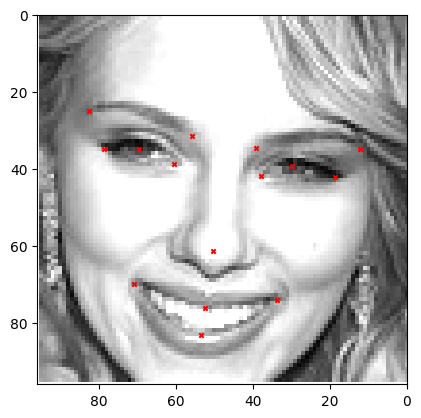

In [ ]:
# Muestra la imagen y los puntos clave faciales utilizando plt.imshow
plt.imshow(imagen_matriz_brillo, cmap='gray')

# Dibuja los puntos clave faciales en la imagen
plt.scatter(coordenadas_x, coordenadas_y, c='r', marker='x', s=10)

# Configura los límites de los ejes
plt.xlim(96, 0)
plt.ylim(96, 0)

# Muestra la imagen con los puntos clave faciales
plt.show()

In [ ]:
# Concatenar los dos DataFrames
df_concatenado = pd.concat([df_concatenado, df_brillo])
df_concatenado.shape

(6420, 31)

### MINI RETO #3:
- Aumenta las imágenes volteándolas verticalmente (Sugerencia: voltea a lo largo del eje x y ten en
cuenta que si lo hacemos a lo largo del eje x, las coordenadas x no cambiarán)

In [ ]:
df_volteado_vertical = df_puntos_faciales.copy()

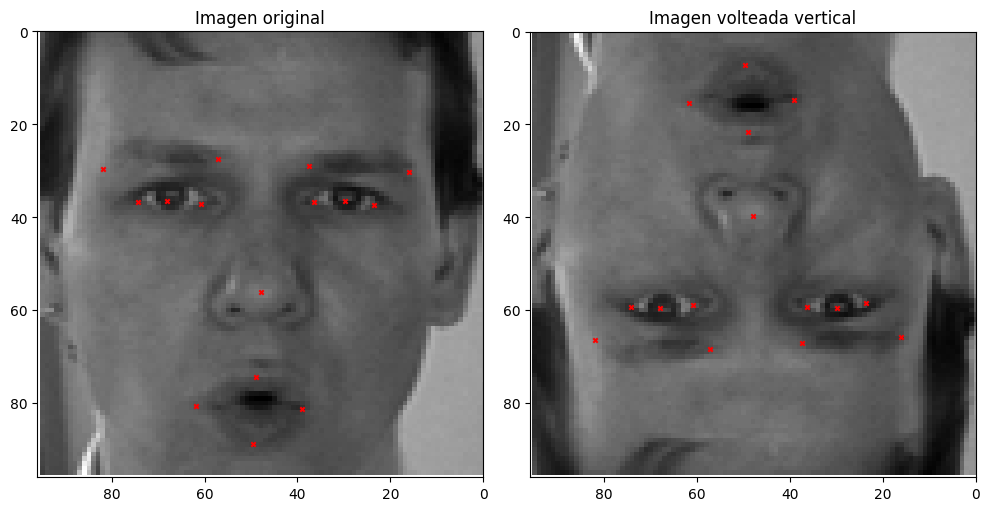

In [ ]:
# Imagen aleatoria y las coordenadas correspondientes
indice_aleatorio = np.random.randint(len(df_volteado_vertical))  # Indice aleatorio dentro del rango de filas del DataFrame
imagen_str = df_volteado_vertical.loc[indice_aleatorio, 'Image']  # Cadena de la imagen correspondiente al índice aleatorio

# Selecciona las columnas pares de las coordenadas x
coordenadas_x = df_volteado_vertical.loc[indice_aleatorio, [col for idx, col in enumerate(df_volteado_vertical.columns) if idx % 2 == 0 and col != 'Image']]

# Selecciona las columnas impares de las coordenadas y
coordenadas_y = df_volteado_vertical.loc[indice_aleatorio, [col for idx, col in enumerate(df_volteado_vertical.columns) if idx % 2 != 0]]

# Convierte la cadena de la imagen en una matriz 2D de forma (96, 96)
imagen_matriz = np.fromstring(imagen_str, sep=' ').reshape(96, 96)
imagen_matriz_volteada = np.flip(imagen_matriz,axis=0)

# Configura el gráfico con subplots para mostrar la imagen original y la volteada
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Muestra la imagen original
axes[0].imshow(imagen_matriz, cmap='gray')
axes[0].scatter(coordenadas_x, coordenadas_y, c='r', marker='x', s=10)
axes[0].set_xlim(96, 0)
axes[0].set_ylim(96, 0)
axes[0].set_title('Imagen original')

# Muestra la imagen volteada
axes[1].imshow(imagen_matriz_volteada, cmap='gray')
axes[1].scatter(coordenadas_x, 96 - coordenadas_y, c='r', marker='x', s=10)
axes[1].set_xlim(96, 0)
axes[1].set_ylim(96, 0)
axes[1].set_title('Imagen volteada vertical')

# Ajusta los espacios entre los subplots
plt.tight_layout()

# Muestra la figura con las dos imágenes
plt.show()

In [ ]:
# Concatenar los dos DataFrames
df_concatenado = pd.concat([df_concatenado, df_volteado_vertical])
df_concatenado.shape

(8560, 31)

### MINI RETO #4:
- Haz una comprobación adicional y visualiza las imágenes.

In [ ]:
# # # Imagen aleatoria y las coordenadas correspondientes
# indice_aleatorio = np.random.randint(len(df_concatenado))  # Indice aleatorio dentro del rango de filas del DataFrame
# imagen_str = df_concatenado.loc[indice_aleatorio, 'Image']  # Cadena de la imagen correspondiente al índice aleatorio

# # # Selecciona las columnas pares de las coordenadas x
# coordenadas_x = df_concatenado.loc[indice_aleatorio, [col for idx, col in enumerate(df_concatenado.columns) if idx % 2 == 0 and col != 'Image']]

# # # Selecciona las columnas impares de las coordenadas y
# coordenadas_y = df_concatenado.loc[indice_aleatorio, [col for idx, col in enumerate(df_concatenado.columns) if idx % 2 != 0]]

# # # Convierte la cadena de la imagen en una matriz 2D de forma (96, 96)
# imagen_matriz = np.fromstring(imagen_str, sep=' ').reshape(96, 96)

# # # Muestra la imagen y los puntos clave faciales utilizando plt.imshow
# plt.imshow(imagen_matriz, cmap='gray')

# # # Dibuja los puntos clave faciales en la imagen
# plt.scatter(coordenadas_x, coordenadas_y, c='r', marker='x', s=10)

# # # Configura los límites de los ejes
# plt.xlim(96, 0)
# plt.ylim(96, 0)

# # # Muestra la imagen con los puntos clave faciales
# plt.show()


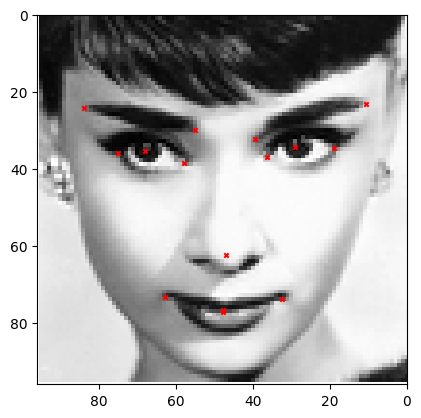

In [ ]:
# Restablecer los índices del DataFrame
df_concatenado_reset = df_concatenado.reset_index(drop=True)

# Verificar si el DataFrame tiene filas
if len(df_concatenado_reset) > 0:
    # Índice aleatorio dentro del rango de filas del DataFrame
    indice_aleatorio = np.random.randint(len(df_concatenado_reset))

    # Imagen aleatoria y las coordenadas correspondientes
    imagen_str = df_concatenado_reset.loc[indice_aleatorio, 'Image']  # Cadena de la imagen correspondiente al índice aleatorio
    coordenadas_x = df_concatenado_reset.loc[indice_aleatorio, [col for idx, col in enumerate(df_concatenado_reset.columns) if idx % 2 == 0 and col != 'Image']]
    coordenadas_y = df_concatenado_reset.loc[indice_aleatorio, [col for idx, col in enumerate(df_concatenado_reset.columns) if idx % 2 != 0]]

    # Convierte la cadena de la imagen en una matriz 2D de forma (96, 96)
    imagen_matriz = np.fromstring(imagen_str, sep=' ').reshape(96, 96)

    # Muestra la imagen y los puntos clave faciales utilizando plt.imshow
    plt.imshow(imagen_matriz, cmap='gray')

    # Dibuja los puntos clave faciales en la imagen
    plt.scatter(coordenadas_x, coordenadas_y, c='r', marker='x', s=10)

    # Configura los límites de los ejes
    plt.xlim(96, 0)
    plt.ylim(96, 0)

    # Muestra la imagen con los puntos clave faciales
    plt.show()
else:
    print("El DataFrame está vacío, no se pueden mostrar imágenes.")


## TAREA #5: NORMALIZACIÓN DE LOS DATOS Y PREPARACIÓN
PARA EL ENTRENAMIENTO

### Obtenemos el valor de las imágenes que está presente en la columna 31 (dado que el índice comienza desde 0, nos referimos a la columna 31 por 30 en Python)

In [ ]:
imagenes = df_concatenado_reset.iloc[:,30]
imagenes

# Convertir la columna "Image" en una lista de listas
imagenes = imagenes.apply(lambda x: [(int(val)/255) for val in x.split()])

print(imagenes)

### Normalizamos las imágenes

Para normalizar las imagenes tenemos que normalizar los datos de los puntos clave faciales. Esto se refiere a que los valores de la variable esten en un mismo rango, y asi no haya caracteristicas que dominen sobre otras. Unificamos asi los datos.
En un segundo paso, escalamos los datos para cada columna por separado. Esto evita que ciertas características faciales dominen sobre otras debido a diferencias en sus escalas originales. Al calcular un factor de escala para cada columna de coordenadas y dividir cada valor por su factor correspondiente, se logra una escala relativa en cada punto clave facial, mejorando así el rendimiento del modelo al aprender patrones relevantes de manera más efectiva y evitar problemas de sesgo causados por diferencias en las escalas de las características.

### Creamos un array vacío de tamaño (x, 96, 96, 1) para subministrar al modelo

In [ ]:
X = np.empty((len(imagenes), 96, 96, 1))

### Iteramos sobre la lista de imágenes y añadimos las nuestras al array vacío tras expandir su dimensión de (96, 96) a (96, 96, 1)

In [ ]:
for i in range(len(imagenes)):
  image_array = np.array(imagenes[i])
  image_reshaped = image_array.reshape((96, 96, 1))
  X[i] = image_reshaped

### Convertimos el tipo array a float32

In [ ]:
X = np.asarray(X).astype(np.float32)
X.shape

(8560, 96, 96, 1)

In [ ]:
df_concatenado_reset = df_concatenado_reset.to_numpy()

In [ ]:
# Obtenemos el valor de las coordenadas x & y que se utilizarán como target.
y = df_concatenado_reset[:,:30]
y = np.asarray(y).astype(np.float32)
y.shape

(8560, 30)

In [ ]:
# Dividimos los datos en entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### MINI RETO #5:
- Intenta usar un valor diferente para `test_size` y verifica que la división es correcta.

In [ ]:
X_train.shape

(6848, 96, 96, 1)

In [ ]:
X_test.shape

(1712, 96, 96, 1)

## Tarea 9: Construir un modelo de red neuronal residual profunda para crear un modelo que detecte puntos faciales clave

In [321]:
def res_block(X, filter,stage):
  # Bloque Convolucional
  X_copy = X
  f1,f2,f3=filter

  # Camino principal
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a',
             kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same',
             name ='res_'+str(stage)+'_conv_b',
             kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c',
             kernel_initializer=glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)

  # Camino Corto
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy',
                  kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)


  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Bloque de Identidad 1
  X_copy = X

  # Camino Principal
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a',
             kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b',
  kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c',
              kernel_initializer=glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # Añadir
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Bloque de Identidad 2
  X_copy = X

  # Camino Principal
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a',
             kernel_initializer=glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b',
             kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c',
             kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

input_shape = (96, 96, 1)

In [322]:
# Tamaño del tensor de entrada
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# 1 - Fase
X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2 - Fase
X = res_block(X, filter= [64,64,256], stage= 2)

# 3 - Fase
X = res_block(X, filter= [128,128,512], stage= 3)

# 4 - Fase
#X = res_block(X, filter= [256,256,1024], stage= 4)

# Average Pooling
X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

# Capa Final
X = Flatten()(X)
X = Dense(6848, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(1712, activation = 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation = 'relu')(X)


model_1_facialKeyPoints = Model(inputs= X_input, outputs = X)
model_1_facialKeyPoints.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_28 (InputLayer)          [(None, 96, 96, 1)]  0           []                               
                                                                                                  
 zero_padding2d_25 (ZeroPadding  (None, 102, 102, 1)  0          ['input_28[0][0]']               
 2D)                                                                                              
                                                                                                  
 conv1 (Conv2D)                 (None, 48, 48, 64)   3200        ['zero_padding2d_25[0][0]']      
                                                                                                  
 bn_conv1 (BatchNormalization)  (None, 48, 48, 64)   256         ['conv1[0][0]']            

In [323]:
# Tamaño del tensor de entrada
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# 1 - Fase
X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2 - Fase
X = res_block(X, filter= [64,64,256], stage= 2)

# 3 - Fase
X = res_block(X, filter= [128,128,512], stage= 3)

# 4 - Fase
#X = res_block(X, filter= [256,256,1024], stage= 4)

# Average Pooling
X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

# Capa Final
X = Flatten()(X)
X = Dense(6848, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(1712, activation = 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation = 'relu')(X)


model_1_facialKeyPoints = Model(inputs= X_input, outputs = X)
model_1_facialKeyPoints.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_29 (InputLayer)          [(None, 96, 96, 1)]  0           []                               
                                                                                                  
 zero_padding2d_26 (ZeroPadding  (None, 102, 102, 1)  0          ['input_29[0][0]']               
 2D)                                                                                              
                                                                                                  
 conv1 (Conv2D)                 (None, 48, 48, 64)   3200        ['zero_padding2d_26[0][0]']      
                                                                                                  
 bn_conv1 (BatchNormalization)  (None, 48, 48, 64)   256         ['conv1[0][0]']            

### MINI RETO #10:
- Experimenta cambiando la arquitectura de la red eliminando 2 capas MaxPooling del Bloque Res y entrena
el modelo de nuevo
- Intenta agregar el bloque `X = res_block (X, filter = [256,256,1024], stage = 4)` después del bloque de la
etapa # 3.
- ¿Qué observas? Comenta tu respuesta

In [ ]:
def res_block(X, filter,stage):
  # Bloque Convolucional
  X_copy = X
  f1,f2,f3=filter

  # Camino principal
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a',
             kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same',
             name ='res_'+str(stage)+'_conv_b',
             kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c',
             kernel_initializer=glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)

  # Camino Corto
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy',
                  kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)


  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Bloque de Identidad 1
  X_copy = X

  # Camino Principal
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a',
             kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b',
             kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c',
              kernel_initializer=glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # Añadir
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Bloque de Identidad 2
  X_copy = X

  # Camino Principal
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a',
             kernel_initializer=glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b',
             kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c',
             kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

input_shape = (96, 96, 1)

In [ ]:
# Tamaño del tensor de entrada
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# 1 - Fase
X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2 - Fase
X = res_block(X, filter= [64,64,256], stage= 2)

# 3 - Fase
X = res_block(X, filter= [128,128,512], stage= 3)

# 4 - Fase
#X = res_block(X, filter= [256,256,1024], stage= 4)

# Average Pooling
X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

# Capa Final
X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation = 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation = 'relu')(X)


model_1_facialKeyPoints = Model(inputs= X_input, outputs = X)
model_1_facialKeyPoints.summary()

Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Total params: 18,016,286
Trainable params: 18,007,710
Non-trainable params: 8,576
__________________________________________________________________________________________________


## Tarea 10: Compilar y entrenar el modelo de Deep Learning para la detección de puntos faciales clave

In [324]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9,
                                beta_2=0.999, amsgrad=False)

model_1_facialKeyPoints.compile(loss="mean_squared_error",
                                optimizer=adam , metrics=['accuracy'])
# Comprueba más sobre el Optimizador Adam en:
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam

In [325]:
import json
# Guardamos el mejor modelo con mejor error de validación
checkpointer = ModelCheckpoint(filepath = "FacialKeyPoints_weights.hdf5", verbose = 1,
                               save_best_only = True)
history = model_1_facialKeyPoints.fit(X_train, y_train, batch_size = 32, epochs = 2,
                                      validation_split =0.05, callbacks=[checkpointer])
# Guardamos la arquitectura del modelo en un JSON para luego usarlo
model_json = model_1_facialKeyPoints.to_json()
with open("FacialKeyPoints-model.json","w") as json_file:
  json_file.write(model_json)

Epoch 1/2


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7dc275e676d0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x7dc275e676d0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
204/204 [==============================] - ETA: 0s - loss: 378.0304 - accuracy: 0.5118

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7dc277110ee0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7dc277110ee0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert

Epoch 1: val_loss improved from inf to 590.54297, saving model to FacialKeyPoints_weights.hdf5
204/204 [==============================] - 304s 1s/step - loss: 378.0304 - accuracy: 0.5118 - val_loss: 590.5430 - val_accuracy: 0.6880
Epoch 2/2
204/204 [==============================] - ETA: 0s - loss: 205.0834 - accuracy: 0.5534
Epoch 2: val_loss improved from 590.54297 to 70.91891, saving model to FacialKeyPoints_weights.hdf5
204/204 [======

### Mini Reto #11:
- Experimenta cambiando el tamaño del lote y el valor de validation split value y vuelve a entrenar
el modelo

## Tarea 11: Evaluar el modelo ResNet entrenado